In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [53]:
def plot_salary_vs_experience(X, y, y_pred = None):
    """
    Plot the actual salaries against years of experience and overlay the predicted salaries.

    Parameters
    ----------
    X_test : pandas.DataFrame
        The test features, specifically the 'YearsExperience' column.
    y_test : pandas.DataFrame
        The actual salary values corresponding to X_test.
    y_pred : numpy.ndarray
        The predicted salary values for the test set generated by the linear regression model.

    """
    plt.figure(figsize=(10, 6))
    
    plt.scatter(X['YearsExperience'], y['Salary'], color='blue', label='Actual Salary')
    
    if y_pred is not None:
        plt.plot(X['YearsExperience'], y_pred, color='red', label='Predicted Salary')
        
    plt.title('Salary vs. Years of Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.legend()
    plt.grid(True)
    plt.show()

    Unnamed: 0  YearsExperience    Salary
0            0              1.2   39344.0
1            1              1.4   46206.0
2            2              1.6   37732.0
3            3              2.1   43526.0
4            4              2.3   39892.0
5            5              3.0   56643.0
6            6              3.1   60151.0
7            7              3.3   54446.0
8            8              3.3   64446.0
9            9              3.8   57190.0
10          10              4.0   63219.0
11          11              4.1   55795.0
12          12              4.1   56958.0
13          13              4.2   57082.0
14          14              4.6   61112.0
15          15              5.0   67939.0
16          16              5.2   66030.0
17          17              5.4   83089.0
18          18              6.0   81364.0
19          19              6.1   93941.0
20          20              6.9   91739.0
21          21              7.2   98274.0
22          22              8.0  1

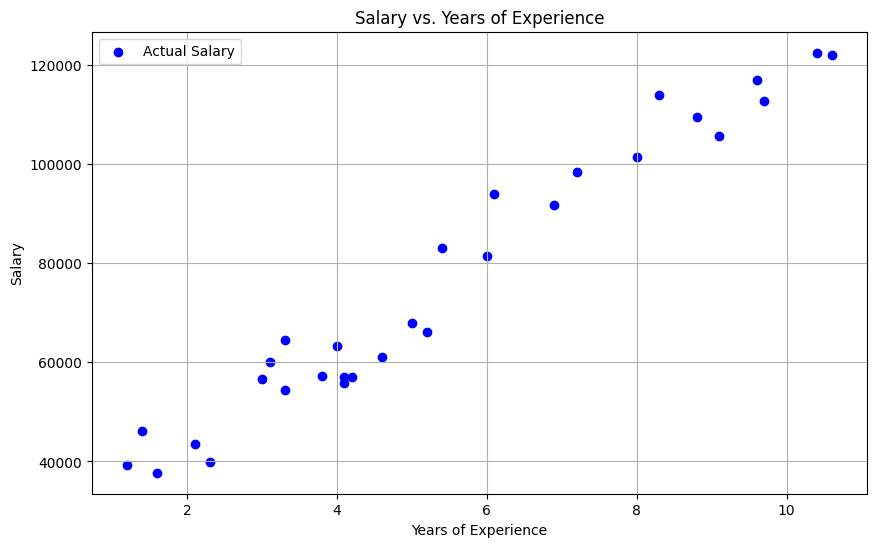

In [44]:
# Data set from here: https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression
df = pd.read_csv("../data/Salary_dataset.csv")

# Print the whole input dataset
print(df)

# Plot the whole input dataset
plot_salary_vs_experience(df[['YearsExperience']], df[['Salary']]) # Kind of weird but meh

In [46]:
def calc_cost(X_train, y_train, w, b):

    """
    Calculate the cost of a linear regression model.

    Note: this function is not used and is here for demonstration

    This function computes the cost of a linear regression model based on the
    mean squared error between the model's predictions and the actual target values.
    The cost is normalized by dividing by twice the number of training examples.

    Parameters
    ----------
    X_train : pandas.DataFrame
        The training data features, with 'YearsExperience' as one of its columns.
    y_train : pandas.Series or pandas.DataFrame
        The actual target values associated with each training example. Expected
        to have a 'Salary' column if a DataFrame is passed.
    w : float
        The weight (coefficient) of the 'YearsExperience' feature in the linear regression model.
    b : float
        The bias (intercept) term in the linear regression model.

    Returns
    -------
    float
        The cost computed using the mean squared error, normalized by dividing by 2m,
        where m is the number of training examples.
    """

    # Number of training examples
    m = X_train.shape[0]
    
    # Calculate all predictions in a vectorized way
    y_hats = w * X_train['YearsExperience'] + b
    
    # Compute the squared errors
    squared_errors = (y_hats - y_train['Salary']) ** 2

    # Calculate the cost, now dividing by 2m
    return squared_errors.sum() / (2 * m)


    

In [47]:
def calc_gradient(X_train, y_train, w, b):
    """
    Calculate the gradients of the cost function with respect to model parameters.

    This function computes the partial derivatives of the cost function, which is based
    on the mean squared error, with respect to the weight (w) and bias (b) of a simple
    linear regression model. These gradients are necessary for the gradient descent
    optimization algorithm to update the model parameters.

    Parameters
    ----------
    X_train : pandas.DataFrame
        The training data features, with 'YearsExperience' as one of its columns.
    y_train : pandas.Series or pandas.DataFrame
        The actual target values associated with each training example. Expected
        to have a 'Salary' column if a DataFrame is passed.
    w : float
        The current value of the weight (coefficient) of the 'YearsExperience' feature.
    b : float
        The current value of the bias (intercept) term.

    Returns
    -------
    tuple
        A tuple containing two floats:
        - The gradient of the cost function with respect to w (dj_dw).
        - The gradient of the cost function with respect to b (dj_db).
    
    Notes
    -----
    The function assumes that the input DataFrame `X_train` and `y_train` have compatible indices
    and that each 'YearsExperience' value in `X_train` corresponds to the 'Salary' in `y_train`.
    """

    m = X_train.shape[0]

    y_hats = w * X_train['YearsExperience'] + b

    dj_dw = (y_hats - y_train['Salary']) * X_train['YearsExperience'] # deriviative function with respect to w
    dj_db = (y_hats - y_train['Salary']) # deriviative function with respect to b

    dj_dw = dj_dw.sum() / m
    dj_db = dj_db.sum() / m

    return dj_dw, dj_db

Model/function: y = 9423.815323624682x + 24380.201475427584


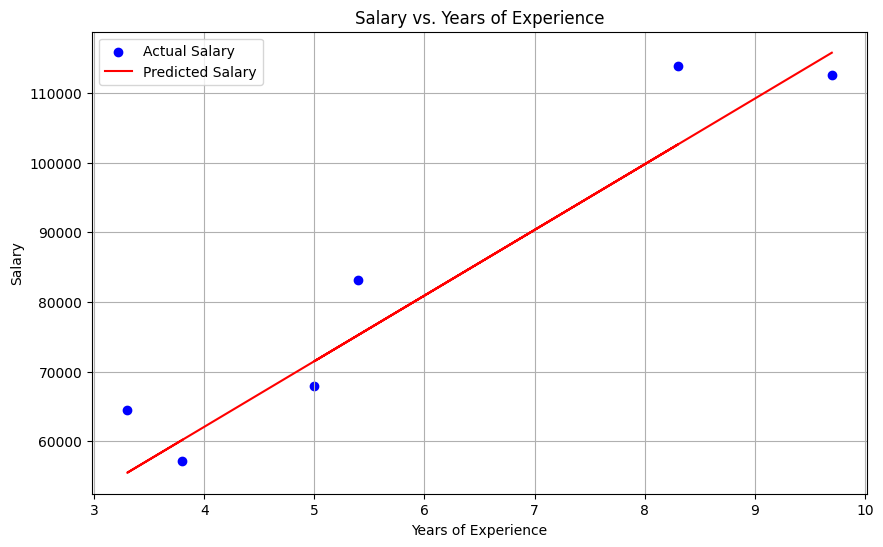

In [54]:
"""
 Runs the computations 
"""

num_iters = 10000
alpha = 1.0e-2 # this is the learning rate

# Initial values (probably should be random values)
b = 0
w = 0

# Split into training set. Note random_state is a seed and ensures the split is the same each time
X_train, X_test, y_train, y_test = train_test_split(df[['YearsExperience']], df[['Salary']], test_size=0.2, random_state=42)

for i in range(num_iters):
    
    """
    Calc the gradient for the current value of w and b

    For each iteration of gradient descent the model params w and b are updated to get closer to the min cost.
    This is achieved by taking a step proportional to the negative of the gradient of the cost function with the current w and b
    scaled by the learing rate (alpha). The learning rate determins the size of the step. By moving in the direction opposite the gradient, 
    gradient descent aims to find the params w and b that minimise the cost function. 
    """
    dj_dw, dj_db = calc_gradient(X_train, y_train, w , b)     

    # Update w and b each time    
    b = b - alpha * dj_db                            
    w = w - alpha * dj_dw 

print(f'Model/function: y = {w}x + {b}')

# Calc using function
y_pred = w * X_test['YearsExperience'] + b

# view the result
plot_salary_vs_experience(X_test, y_test, y_pred)


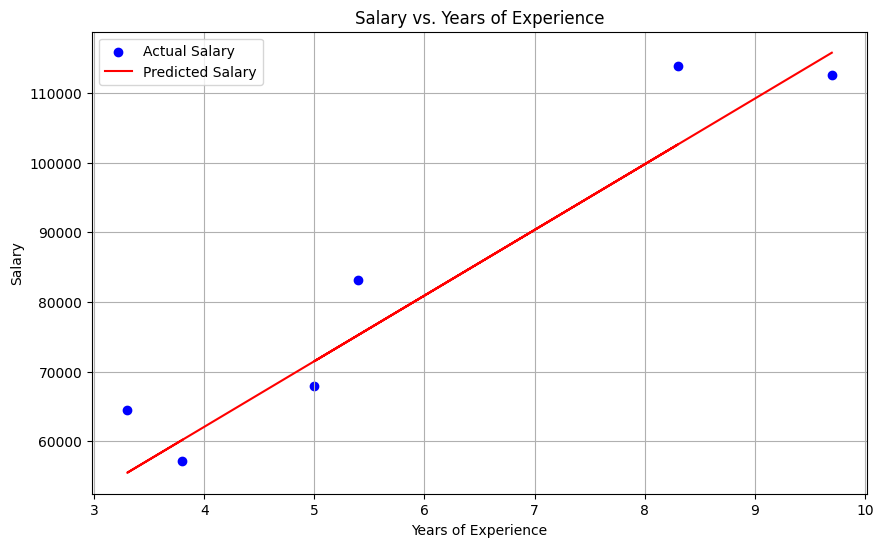

In [55]:
from sklearn.linear_model import LinearRegression
"""
Now just use scikit learn!
"""

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# view the result
plot_salary_vs_experience(X_test, y_test, y_pred)

